 ---
 # Prática 4: Análisis en el dominio de la frecuencia(DF) del circuito serie de segundo orden R-L-C.
 ---
> Autores: Jorge del Río López, Carlos González García y Javier Rodríguez Urbano.
>
> Fecha: 2024-11-26
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [286]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
Pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093

In [287]:
xlsx_name="P4_guion_hojaCalculoParaMedidas.ods" #Importamos el fichero que contiene los datos.

In [288]:
#Creamos una funcion para convertir n listas en arrays.
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)

def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

#Funcioón que usaremos para calcular errores relativos.
def ErrorRelativo(exp,teor):
    return (abs(exp - teor)/abs(teor))*100

def AjusteLineal(x1,x2,y1,y2):
    x1 = 2*Pi*x1
    x2 = 2*Pi*x2
    alfa = x2-x1
    beta = y2-y1
    intercep = -(beta/alfa)*x1 + y1
    pendiente = beta/alfa

    return pendiente, intercep

def ValorR(pendiente, intercep,frecu):
    return frecu*pendiente + intercep


---
<h1 style="text-align: center;">[P4.C0]</h1>

---

Definimos el valor para la frecuencia de resonancia $\omega_0$ como $\omega_0\ = \dfrac{1}{\sqrt{L\ C}}$.


Definimos el valor de $u$ como $u\ =\ \dfrac{\omega}{\omega_0}$.


Llamamos también a $\delta$ factor de amortiguamiento, calculado como $\delta\ =\ \dfrac{R}{2}\ \sqrt{\dfrac{C}{L}}$.

___

---


Mostramos aquí las expresiones de la función de transferencia, con su módulo y argumento.
##### Función transferencia del Condensador: 
$\~T_C(u) = \dfrac{1}{(1-u^2) + j2\delta u}$
##### Módulo del Condensador: 
$\lvert \~T_C(u) \rvert = \dfrac{1}{\sqrt{(1-u^2)^2 + (2\delta u)^2}}$
##### Fase del Condensador: 
$\text{Arg}(\~T_C(u)) = -\arctan\left(\dfrac{2\delta u}{1-u^2}\right)$

___

---
##### Función transferencia de la Resistencia: 
$\~T_R(u) = \dfrac{j2\delta u}{(1-u^2) + j2\delta u}$
##### Módulo de la Resistencia: 
$\lvert \~T_R(u) \rvert = \dfrac{2\delta u}{\sqrt{(1-u^2)^2 + (2\delta u)^2}}$
##### Fase de la Resistencia: 
$\text{Arg}(\~T_R(u)) = \dfrac{\pi}{2} - \arctan\left(\dfrac{2\delta u}{1-u^2}\right)$

---
<h1 style="text-align: center;">[P4.C1]</h1>

---


In [ ]:
DatosParteC1 = pd.read_excel(xlsx_name,sheet_name="C1")

# Extraemos los valores:

ValoresTeoricos = DatosParteC1["Valor nominal"].tolist()
ValoresPracticos = DatosParteC1["Valor medido"].tolist()


# Tras tener los valores tanto teóricos como prácticos extraemos de la lista los valores de la resistencia, capacidad e inducción.

#--------------------------------------------------------------
#Resistencia
#--------------------------------------------------------------

ResistenciaTeo = ValoresTeoricos[0]
ResistenciaPra = ValoresPracticos[0]

# Le añadimos la resistencia de la fuente.

ResistenciaPra = ResistenciaPra + 50
ResistenciaTeo = ResistenciaTeo + 50

# Extraemos los valores de la resistencias de la Bobina

ResistenciaBobinaBaja = ValoresPracticos[3]
ResistenciaBobinaAlta = ValoresPracticos[4]
pendiente,intercep = AjusteLineal(120,1000,ResistenciaBobinaBaja,ResistenciaBobinaAlta)

#--------------------------------------------------------------
# Capacidad
#--------------------------------------------------------------

CapacidadTeo = ValoresTeoricos[1]
CapacidadPra = ValoresPracticos[1]

# Cambiamos la unidades del Condesador

CapacidadTeo = CapacidadTeo*1e-9
CapacidadPra = CapacidadPra*1e-9

#--------------------------------------------------------------
# Inductancia
#--------------------------------------------------------------

InductanciaTeo = ValoresTeoricos[2]
InductanciaPra = ValoresPracticos[2]

# Cambiamos la unidades de la Bobina

InductanciaTeo = InductanciaTeo*1e-3
InductanciaPra = InductanciaPra*1e-3

# Calculo de la Frecuencia de Resonancia teórica

FrecuenciaResonanciaTeo = 1/(math.sqrt(CapacidadTeo*InductanciaTeo))

# Calculo del Factor de Amortiguamiento teórico

FactorAmortiguadorTeo = (ResistenciaTeo/2)*(math.sqrt((CapacidadTeo/InductanciaTeo)))
FactorAmortiguadorTeo2 = ((ResistenciaTeo+ResistenciaBobinaAlta)/2)*(math.sqrt((CapacidadTeo/InductanciaTeo)))


# Calculo de la Frecuencia de Resonancia experimental

FrecuenciaResonanciaPra = 1/(math.sqrt(CapacidadPra*InductanciaPra))

print(f'La frecuencia de resonancia teórica es: {round(FrecuenciaResonanciaTeo,2)} rad/s.')
print(f'La frecuencia de resonancia practica es: {round(FrecuenciaResonanciaPra,2)} rad/s.\n')

print(f'El valor de la frecuencia teórica es {round(FrecuenciaResonanciaTeo/(2*Pi),2)} Hz.')
print(f'El valor de la frecuencia práctica es {round(FrecuenciaResonanciaPra/(2*Pi),2)} Hz.\n')

print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(FrecuenciaResonanciaPra/(2*Pi),FrecuenciaResonanciaTeo/(2*Pi)),2)} %.')

La frecuencia de resonancia teórica es: 145864.99 rad/s.
La frecuencia de resonancia practica es: 147381.57 rad/s.

El valor de la frecuencia teórica es 23215.13 Hz.
El valor de la frecuencia práctica es 23456.51 Hz.

Esto nos  proporciona un error relativo del: 1.04 %.


---
<h1 style="text-align: center;">[P4.C2]</h1>

---

In [ ]:
DatosParteC2 = pd.read_excel(xlsx_name,sheet_name="C2")

# Extraemos los valores:
FrecuenciaResonanciaC2 = DatosParteC2["fresonancia"].tolist()

print(f'La frecuencia de resonancia se encontro a  {round(FrecuenciaResonanciaC2[0])} Hz.')

print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(FrecuenciaResonanciaC2[0],FrecuenciaResonanciaTeo/(2*Pi)),2)} % con la teórica.')

La frecuencia de resonancia se encontro a  23470 Hz.
Esto nos  proporciona un error relativo del: 1.1 % con la teórica.


Pudimos encontrar esta frecuencia de resonancia experimentalmente usando que, cuando estuvieramos en ella, en el modo XY del osciloscopio se podía observar, en lugar de una elipse, una línea recta. Que visualmente tenga esta característica se debe a que cuando el circuito alcanza la frecuencia de resonancia el voltaje y la intensidad están en fase.

En términos de teoría de circuitos, podemos encontrar que en la frecuencia de resonancia la impedancia del circuito es un número real. Esto es consecuencia de que las impedancias complejas asociadas al condensador e inductor se cancelan. Este hecho es el que implica que en este caso el voltaje y la intensidad estén en fase.

En consecuencia, cuando no lo están, observábamos elipses en el resto de medidas.

Debido a las fluctuaciones asociadas al visor y medidas del osciloscopio (ruidos en la señal eléctrica) y a la imposibilidad de determinar con exactitud la frecuencia introducida al circuito, aparece un ligero error en la medida. Sin embargo, a pesar de las dificultades, la medida del error es lo suficientemente baja como para que podamos considerarla satisfactoria.

---
<h1 style="text-align: center;">[P4.C3]</h1>

---


En este apartado haremos el diagrama de Bode de la función transferencia de la Resistencia, tanto teóricamente como de manera experimental.

El módulo experimental ha sido calculado dividiendo el voltaje de entrada entre el voltaje medido en la resistencia, la fase experimental ha sido calculada tal y como se explica en el apéndice del guión, haciendo la siguiente operación: $\Delta\phi\ =\ arcsin\left(\dfrac{a}{b}\right).$

El módulo teórico ha sido calculado usando las ecuaciones expuestas en P4.C0.

In [291]:
# Recogemos los datos del excel.

DatosParteC3 = pd.read_excel(xlsx_name,sheet_name='C3',usecols='A:E')

Frecuencia = DatosParteC3["f(kHz)"].tolist()
VoltajeFuente = DatosParteC3["Ve(V)"].tolist()
VoltajeResist = DatosParteC3["VR(V)"].tolist()
ValorA = DatosParteC3["a"].tolist()
ValorB = DatosParteC3["b"].tolist()

In [292]:
# Definimos las listas que usaremos para el diagrama de Bode.

FrecuenciaAnguPra = []# Lista que guardara la Frecuencia Angular que usaremos para representa los diagrmas de Bode
FrecuenciaResonanciaAngularRes = [] # Lista que guarda los valores de u para su posterior ploteo.
FrecuenciaResonanciaAngularCond = []# Lista que guarda los valores de u para su posterior ploteo.

# Las listas de abajo guardaran los valores que representan (modulo o fase), ya bien sean teóricos o experiemntales.

ModuloTRPrac = []
ModuloTCPrac = []

ModuloTRTeo = []
ModuloTRTeo2 = []

ModuloTCTeo = []
ModuloTCTeo2 = []

FaseTRPrac = []
FaseTCPrac = []

FaseTRTeo = []
FaseTRTeo2 = []

FaseTCTeo = []
FaseTCTeo2 = []

EpsilonC1 = []
EpsilonC2 = []

EpsilonR1 = []
EpsilonR2 = []

In [293]:
# Convertimos las listas en arrays
Frecuencia,ValorA,ValorB = ConverArray3(Frecuencia,ValorA,ValorB)
VoltajeFuente,VoltajeResist = ConverArray2(VoltajeFuente,VoltajeResist)


# Definimos la frecuencia angular como:
FrecuenciaAnguPra = Frecuencia.copy()*(2*Pi*1000)

#----------------------------------------------------------------------------------------------------------------------------------
# Calculamos los modulos y fases teóricos.
#----------------------------------------------------------------------------------------------------------------------------------

# Definimos "u" como w/w0.
u = 0
for i in FrecuenciaAnguPra:
    i = float(i)
    u = i/FrecuenciaResonanciaTeo
    FrecuenciaResonanciaAngularRes.append(u)
    # Calculo de los Modulos

    ModuloTRTeo.append((2*u*FactorAmortiguadorTeo)/(math.sqrt(((1-u**2)**2) + (2*FactorAmortiguadorTeo*u)**2)))
    ModuloTRTeo2.append((2*u*FactorAmortiguadorTeo2)/(math.sqrt(((1-u**2)**2) + (2*FactorAmortiguadorTeo2*u)**2)))

    # Calculo de las Fases

    #FaseTRTeo.append(-(Pi/2) - math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2))))
    if math.atan((2*FactorAmortiguadorTeo2*u)/(1-(u**2)))>0:
        FaseTRTeo2.append((Pi/2) - math.atan((2*FactorAmortiguadorTeo2*u)/(1-(u**2))))
    else:
        FaseTRTeo2.append(-(Pi/2) - math.atan((2*FactorAmortiguadorTeo2*u)/(1-(u**2))))

    if math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2)))>0:
        FaseTRTeo.append((Pi/2) - math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2))))
    else:
        FaseTRTeo.append(-(Pi/2) - math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2))))
    

#----------------------------------------------------------------------------------------------------------------------------------
# Calculamos los modulos y fases prácticos.
#----------------------------------------------------------------------------------------------------------------------------------


j = 0
for i in VoltajeFuente:
    # Calculo de los modulos
    ModuloTRPrac.append(VoltajeResist[j]/i)
    j += 1
    
# El valor de la fase se calcula como se expresa en P4C0
j = 0
for i in ValorA:
    i = float(i)# Cambiamos los valores a float para que math pueda hacer el calculo.
    k = float(ValorB[j])
    # Calculamos la fase.
    FaseTRPrac.append(math.asin(i/k))
    j += 1

for i in range(0,len(ModuloTRTeo)):
    EpsilonR1.append(ErrorRelativo(ModuloTRPrac[i],ModuloTRTeo[i]))
    EpsilonR2.append(ErrorRelativo(ModuloTRPrac[i],ModuloTRTeo2[i]))

#Ponemos los datos en una tabla.
data = {'TR Exper.': ModuloTRPrac,
        'TR Teor1.': ModuloTRTeo,
        'Epsilon R1(%)': EpsilonR1,
        'TR Experi.': ModuloTRPrac,
        'TR Teor2.': ModuloTRTeo2,
        'Epsilon R2 (%)': EpsilonR2}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')


Datos:
    TR Exper.  TR Teor1.  Epsilon R1(%)  TR Experi.  TR Teor2.  Epsilon R2 (%)
0    0.303136   0.324167       6.487774    0.303136   0.445093       31.893862
1    0.350000   0.395791      11.569493    0.350000   0.530084       33.972781
2    0.434028   0.476080       8.833081    0.434028   0.617596       29.723022
3    0.525862   0.594493      11.544432    0.525862   0.731359       28.097997
4    0.639706   0.726184      11.908626    0.639706   0.837411       23.609073
5    0.691667   0.771065      10.297174    0.691667   0.869026       20.408966
6    0.720833   0.807646      10.748835    0.720833   0.893227       19.300059
7    0.767544   0.849922       9.692432    0.767544   0.919532       16.528903
8    0.915842   0.968977       5.483706    0.915842   0.984889        7.010663
9    0.988095   0.999428       1.133905    0.988095   0.999728        1.163584
10   0.900000   0.932575       3.492994    0.900000   0.966189        6.850511
11   0.772727   0.823422       6.156582    0.

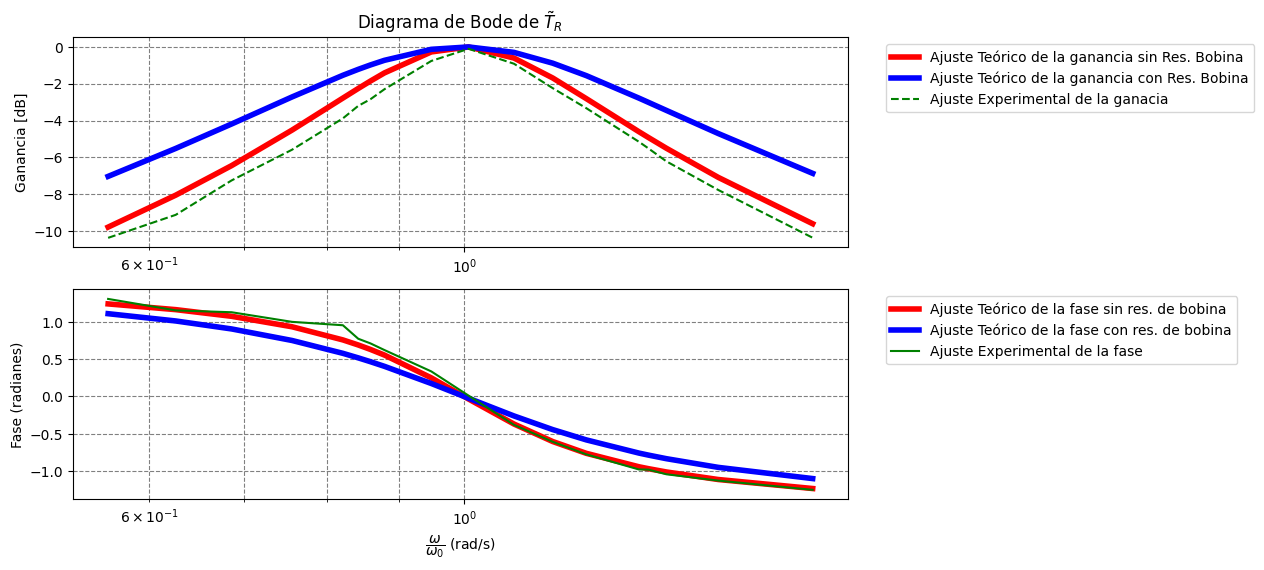

In [294]:
# Representamos los diagramas de Bode.

#----------------------------------------------------------------
# Teórico
#----------------------------------------------------------------

GananciaTeoR = []# Este lista tomara el valor de la ganancia teórica
for i in ModuloTRTeo:
    #GananciaTeoR.append(abs(i))
    GananciaTeoR.append(20 * math.log10(abs(i))) #Esta formula se usaría para representar la ganancia en dB


GananciaTeoR2 = []# Este lista tomara el valor de la ganancia teórica
for i in ModuloTRTeo2:
    #GananciaTeoR2.append(abs(i))
    GananciaTeoR2.append(20 * math.log10(abs(i))) #Esta formula se usaría para representar la ganancia en dB


#----------------------------------------------------------------
# Práctico
#----------------------------------------------------------------

GananciaPracR = []# Este lista tomara el valor de la ganancia práctica
for i in ModuloTRPrac:
    #GananciaPracR.append(abs(i))
    GananciaPracR.append(20 * math.log10(abs(i))) #Esta formula se usaría para representar la ganancia en dB

# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(FrecuenciaResonanciaAngularRes, GananciaTeoR,label="Ajuste Teórico de la ganancia sin Res. Bobina",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularRes, GananciaTeoR2,label="Ajuste Teórico de la ganancia con Res. Bobina",color="blue",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularRes, GananciaPracR,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode de $\~{T}_R$")
plt.ylabel("Ganancia [dB]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")


# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaResonanciaAngularRes, FaseTRTeo,label="Ajuste Teórico de la fase sin res. de bobina",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularRes, FaseTRTeo2,label="Ajuste Teórico de la fase con res. de bobina",color="blue",lw=4)  # Gráfica semilogarítmica

plt.semilogx(FrecuenciaResonanciaAngularRes, FaseTRPrac,label='Ajuste Experimental de la fase',color='green')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel(r"$\dfrac{\omega}{\omega_0} $ (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()

Podemos encontrar las frecuencias de corte sabiendo que para ambas la fase medida es de 45º o $\dfrac{\pi}{4}$ radianes.

Las frecuencias de corte son puntos en los que la amplitud de la señal queda reducida a $\dfrac{1}{\sqrt{2}}$ de su valor máximo. Es decir, el seno de la fase de la señal debe tomar este mismo valor. Fuimos capaces de obtener un valor aproximado para las frecuencias de corte.

Ahora, con ayuda del diagrama de Bode, determinamos el ancho de banda y el factor de calidad.

Para el ancho de banda usamos: $BW_\omega = \omega_{c2} - \omega_{c1} = 2\pi \left(f_{c2} - f_{c1}\right)$

Y para calcular el factor de calidad: $Q = \dfrac{\omega_0}{BW_\omega} = \dfrac{f_0}{f_{c2} - f_{c1}}$

En cuanto al diagrama de Bode, podemos observar que los datos experimentales y teóricos están bien relacionados a pesar de ligeras desviaciones posiblemente debidas a la falta de idealidad de los componentes o ligeros error de precisión.

Presentamos a continuación los valores obtenidos para las frecuencias de corte, el ancho de banda y el factor de calidad.

In [ ]:
# Calculo de la 1º Frecuencia de Corte.
j = 0
for i in range(0,len(FrecuenciaResonanciaAngularRes)):
    j+=1
Pendiente = ((GananciaPracR[6]-GananciaPracR[5])/(math.log10(FrecuenciaResonanciaAngularRes[6])-math.log10(FrecuenciaResonanciaAngularRes[5])))
Ordenada = GananciaPracR[5] - (Pendiente*math.log10(FrecuenciaResonanciaAngularRes[5]))
ValoRecta = ((-3+GananciaPracR[9]- Ordenada)/(Pendiente))
frecuecniaCorte1 = (10**ValoRecta) * FrecuenciaResonanciaPra/(2*Pi)
print(f"La primera frecuencia de corte es: {round(frecuecniaCorte1,2)} Hz.")

# Calculo de la 2º Frecuencia de Corte.

j = 0
for i in range(0,len(FrecuenciaResonanciaAngularRes)):
    j+=1
Pendiente2 = ((GananciaPracR[12]-GananciaPracR[11])/(math.log10(FrecuenciaResonanciaAngularRes[12])-math.log10(FrecuenciaResonanciaAngularRes[11])))
Ordenada2 = GananciaPracR[11] - (Pendiente2*math.log10(FrecuenciaResonanciaAngularRes[11]))
ValoRecta2 = ((-3+GananciaPracR[9]- Ordenada2)/(Pendiente2))
frecuecniaCorte2 = (10**ValoRecta2) * FrecuenciaResonanciaPra/(2*Pi)
print(f"La segunda frecuencia de corte es: {round(frecuecniaCorte2,2)} Hz.")

print(f"Con estos valores de las frecuencias obtenemos el ancho de banda: {round(2*Pi*(frecuecniaCorte2-frecuecniaCorte1),2)}.")
print(f"Con el valor del ancho de banda calculamos el factor de Calidad: {round(FrecuenciaResonanciaTeo/(frecuecniaCorte2-frecuecniaCorte1),2)}.")

La primera frecuecnia de corte es: 19860.18 Hz.
La primera frecuecnia de corte es: 28277.15 Hz.
Con estos valores de las frecuencias obtenemos el ancho de banda: 52885.41.
Con el valor del ancho de banda calculamos el factor de Calidad: 17.33.


---
<h1 style="text-align: center;">[P4.C4]</h1>

---



En este apartado nos encargaremos de hacer el digrama de Bode del condensador.


EXPLICARR PORQUE SE LE RESTA PI A LAS FASE

AÑADIR EXPLICACIONES AL FINAL DE PQ NO HAY FREC DE CORTE

In [296]:
DatosParteC4 = pd.read_excel(xlsx_name,sheet_name='C4',usecols='A:E')
# Recogemos los datos del excel.

FrecuenciaCond = DatosParteC4["f(kHz)"].tolist()
VoltajeFuente2 = DatosParteC4["Ve(V)"].tolist()
VoltajeConden = DatosParteC4["VC(V)"].tolist()
ValorA2 = DatosParteC4["a"].tolist()
ValorB2 = DatosParteC4["b"].tolist()

In [297]:
# Convertimos las listas en arrays
FrecuenciaCond,ValorA2,ValorB2 = ConverArray3(FrecuenciaCond,ValorA2,ValorB2)
VoltajeFuente2,VoltajeConden = ConverArray2(VoltajeFuente2,VoltajeConden)

# Definimos la frecuencia angular como:
FrecuenciaAnguPra = []
FrecuenciaAnguPra = FrecuenciaCond.copy()*(2*Pi*1000)


In [298]:
# Definimos "u" como w/w0.
u = 0
for i in FrecuenciaAnguPra:
    i = float(i)
    u = i/FrecuenciaResonanciaTeo
    FrecuenciaResonanciaAngularCond.append(u)
    # Calculo de los Modulos

    ModuloTCTeo.append(1/(math.sqrt((1-(u**2))**2 + (2*FactorAmortiguadorTeo*u)**2)))
    ModuloTCTeo2.append(1/(math.sqrt((1-(u**2))**2 + (2*FactorAmortiguadorTeo2*u)**2)))

    # Calculo de las Fases


    if math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2)))>0:
        FaseTCTeo.append(-math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2))))
    else:
        FaseTCTeo.append(math.atan(abs((2*FactorAmortiguadorTeo*u)/(1-(u**2)))) - Pi)

    if math.atan((2*FactorAmortiguadorTeo2*u)/(1-(u**2)))>0:
        FaseTCTeo2.append(-math.atan((2*FactorAmortiguadorTeo2*u)/(1-(u**2))))
    else:
        FaseTCTeo2.append(math.atan(abs((2*FactorAmortiguadorTeo2*u)/(1-(u**2)))) - Pi)

#----------------------------------------------------------------------------------------------------------------------------------
# Calculamos los modulos y fases prácticos.
#----------------------------------------------------------------------------------------------------------------------------------


j = 0
for i in VoltajeFuente2:
    # Calculo del modulo
    ModuloTCPrac.append(VoltajeConden[j]/i)
    j += 1
j = 0
for i in ValorA2:
    i = float(i)
    k = float(ValorB2[j])
    # Calculamos la fase.
    if i/k <0:
        FaseTCPrac.append(math.asin(i/k))
    else:
        FaseTCPrac.append(math.asin(i/k) - (Pi))
    j += 1

for i in range(0,len(ModuloTCTeo)):
    EpsilonC1.append(ErrorRelativo(ModuloTCPrac[i],ModuloTCTeo[i]))
    EpsilonC2.append(ErrorRelativo(ModuloTCPrac[i],ModuloTCTeo2[i]))

#Ponemos los datos en una tabla.
data = {'TR Exper.': ModuloTCPrac,
        'TR Teor1.': ModuloTCTeo,
        'Epsilon R1(%)': EpsilonC1,
        'TR Experi.': ModuloTCPrac,
        'TR Teor2.': ModuloTCTeo2,
        'Epsilon R2 (%)': EpsilonC2}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')

Datos:
    TR Exper.  TR Teor1.  Epsilon R1(%)  TR Experi.  TR Teor2.  Epsilon R2 (%)
0    1.013514   1.002781       1.070261    1.013514   1.002485        1.100082
1    1.054054   1.024331       2.901731    1.054054   1.021634        3.173324
2    1.164384   1.126273       3.383800    1.164384   1.109491        4.947526
3    1.465753   1.451269       0.998036    1.465753   1.355933        8.099260
4    1.638889   1.590353       3.051921    1.638889   1.444361       13.468058
5    1.888889   1.838748       2.726923    1.888889   1.575758       19.871746
6    2.222222   2.181696       1.857558    2.222222   1.699295       30.773170
7    2.470588   2.319148       6.529999    2.470588   1.604372       53.991008
8    2.176471   2.043951       6.483514    2.176471   1.462712       48.796909
9    1.527778   1.497990       1.988504    1.527778   1.175507       29.967507
10   1.323944   1.273158       3.988981    1.323944   1.041116       27.165834
11   0.972222   0.926105       4.979741    0.

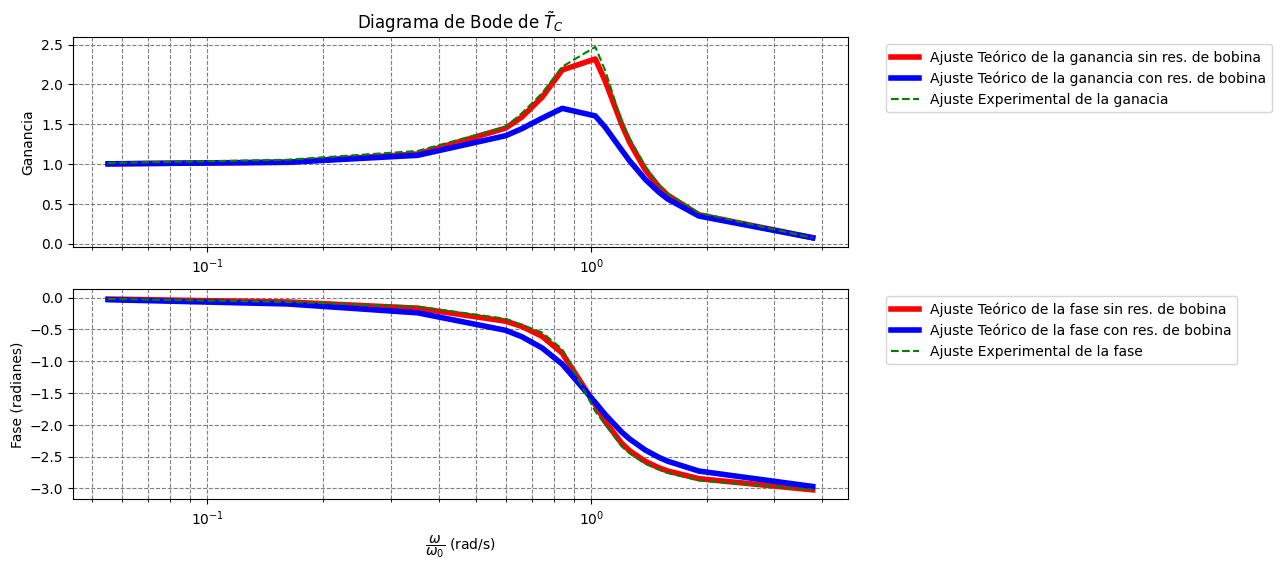

In [299]:
# Representamos los diagramas de Bode.

#----------------------------------------------------------------
# Teórico
#----------------------------------------------------------------

GananciaTeoC = []# Este lista tomara el valor de la ganancia teórica
for i in ModuloTCTeo:
    GananciaTeoC.append(abs(i))

GananciaTeoC2 = []# Este lista tomara el valor de la ganancia teórica
for i in ModuloTCTeo2:
    GananciaTeoC2.append(abs(i))
#----------------------------------------------------------------
# Práctico
#----------------------------------------------------------------

GananciaPracC = []# Este lista tomara el valor de la ganancia práctica
for i in ModuloTCPrac:
    GananciaPracC.append(abs(i))

# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(FrecuenciaResonanciaAngularCond, GananciaTeoC,label="Ajuste Teórico de la ganancia sin res. de bobina",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, GananciaTeoC2,label="Ajuste Teórico de la ganancia con res. de bobina",color="blue",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, GananciaPracC,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode de $\~{T}_C$")
plt.ylabel("Ganancia")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaResonanciaAngularCond, FaseTCTeo,label="Ajuste Teórico de la fase sin res. de bobina",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, FaseTCTeo2,label="Ajuste Teórico de la fase con res. de bobina",color="blue",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, FaseTCPrac,label='Ajuste Experimental de la fase',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel(r"$\dfrac{\omega}{\omega_0} $ (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()